# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Looping-the-Property-Extraction" data-toc-modified-id="Looping-the-Property-Extraction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Looping the Property Extraction</a></div><div class="lev1 toc-item"><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></div><div class="lev1 toc-item"><a href="#Filling-arrays-in-a-loop" data-toc-modified-id="Filling-arrays-in-a-loop-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filling arrays in a loop</a></div><div class="lev1 toc-item"><a href="#Saving-your-results-to-disk" data-toc-modified-id="Saving-your-results-to-disk-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Saving your results to disk</a></div><div class="lev1 toc-item"><a href="#Data-Summary" data-toc-modified-id="Data-Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Summary</a></div><div class="lev1 toc-item"><a href="#Plotting-Data" data-toc-modified-id="Plotting-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plotting Data</a></div><div class="lev2 toc-item"><a href="#Histograms" data-toc-modified-id="Histograms-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Histograms</a></div><div class="lev2 toc-item"><a href="#Box-Plots" data-toc-modified-id="Box-Plots-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Box-Plots</a></div><div class="lev1 toc-item"><a href="#The-End" data-toc-modified-id="The-End-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>The End</a></div>

# Looping the Property Extraction

In the last exercise we saw how to extract the properties of individual objects in an image. We will now combine all the actions of reading, thresholding, labeling and measuring into a loop. 

To make it easy to understand I have pasted a possible method of doing this, try to understand as much as you can by looking at the program and reading the comments. We will briefly explore parts of the code subsequently.

In [8]:
# Import required packages
# File handling
import os
import glob
# Array handling
import numpy as np
# Image handling
from skimage.io import imread 
# Image thresholding and measurement
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects
from skimage.measure import label, regionprops


# Instruction to jupyter notebook to show images within document
%matplotlib inline


# Function to label images
def an_thresh_label_image(in_img):
    """Funtion to take in image and return a labelled image for use in regionprops. 
    The remove_small_objects() function is applied to remove small bright objects"""
    
    thresh_val = threshold_otsu(in_img)
    thresh_img = in_img>thresh_val
    thresh_img = remove_small_objects(thresh_img)
    label_img = label(thresh_img)
    return label_img


###### MAIN PROGRAM ######

# Define file paths and image pattern
root_root = '/home/aneesh/Images/Source/' # Replace as per local configuration
file_patt = '/*.tif' # pattern of file that is searched for by glob.glob()

# Get list of folders with images
folds = os.listdir(root_root)
# Get a list of lists (corresponding to number of folders) of full file paths
file_paths = [glob.glob(root_root+fold+file_patt) for fold in folds]

# Define empty arrays to be filled in the loop
out_celltype = np.array([])
out_area = np.array([])
out_maj_axis_length = np.array([])
# Iterate over lists in the file_paths list
for i, fold in enumerate(file_paths):
    # Iterate over individual file paths in the lists
    for j,file_path in enumerate(fold):
        # Read Image
        in_img = imread(file_path, as_grey=True)
        # Label Image
        lbl_im = an_thresh_label_image(in_img)
        
        # Extract properties
        r_props = regionprops(label_image=lbl_im, intensity_image=in_img)
        # Store Area
        out_area = np.append(out_area, np.array([rp.area for rp in r_props]))
        # Store Major Axis Length
        out_maj_axis_length = np.append(out_maj_axis_length, np.array([rp.major_axis_length for rp in r_props])) 
        # Store cell type corresponding to each object
        out_celltype = np.append(out_celltype,[folds[i]]*len(r_props))        

# Functions

As you read through the program, most things will seem familiar except this section:

In [ ]:
# Function to label images
def an_thresh_label_image(in_img):
    """Funtion to take in image and return a labelled image for use in regionprops. 
    The remove_small_objects() function is applied to remove small bright objects"""
    
    thresh_val = threshold_otsu(in_img)
    thresh_img = in_img>thresh_val
    thresh_img = remove_small_objects(thresh_img)
    label_img = label(thresh_img)
    return label_img


This is a function definition.. That's right we can define our own functions. This function in particular takes a normal image as the input, performs thresholding, removes small objects, performs labeling and returns the labelled image. 

The function might seem unnecessrary when you can just put then code in your main program. However functions allow you to break up the program into smaller bits which are easier to manage and test. You should employ functions every chance you get. Cleaner, easier to read code is much easier to understand. 

If you come from other programming languages, you will be a bit irritated by the fact that Python does not use explicit start and end curly brackets to define where a function starts and ends. Instead, like with for-loops, the indentation determines the function definition. 

Some functions return an object and some don't. The funtion `print()` for example doesn't actually return anything, but isntead just prints a statement on the screen. In contrast our function returns a labeled image. This is defined by the line:

`return label_image`

This function gets called in the inner loop of the main program after the image is read. It is important to understand that what is done in a function stays in the function. This means that the variables defined, the names of the variable exist only in the context of the function. Even the values returned are returned without name. Thus when the function is called we store the result in the variable '`lbl_im`. 

# Filling arrays in a loop

The next lines where we define the paths and get the file lists should also be familiar. Since we want to extract and work with the properties extracted from the images we need to store them in some fashion. For this we employ arrays. At the start of the loops we define empty arrays:

In [ ]:
# Define empty arrays to be filled in the loop
out_celltype = np.array([])
out_area = np.array([])
out_maj_axis_length = np.array([])

These arrays are then filled in the loop with the extracted properties. The "filling" is done by actually appending new values to the old array and calling the this new appended array the same name as the old array. This renaming allows us to loop over without much of a headache. 
For example the `out_area` array is filled as below:

In [ ]:
out_area = np.append(out_area, np.array([rp.area for rp in r_props]))

**Note:** The way of filling arrays that we have employed works well enough for our small example but might be unsatisfactory due to the memory reallocation overheads for larger datasets. There are ways around this such as "preallocation" which should be looked at if needed. 

# Saving your results to disk

Now that we have all the properties we want saved in 3 arrays, we would like to save the results to a file which we can open for statistical analysis such as Excel, Origin or GraphPad. The go-to format for such files is the csv format. In python the "pandas" package gives a very handy way of creating data types called "DataFrames" to collect information in a spreadsheet like system and also save it. 

This is done as below:

In [ ]:
import pandas as pd

# path to save csv file
save_path = '/home/aneesh/Images/Analysis/'

# create data frame using the created arrays as input. Each array is named by the strings in quotes.
props_df = pd.DataFrame.from_items([("CellType",out_celltype), ("Area",out_area), ("MajAxisLength",out_maj_axis_length)])

# combine the save path with file name and save to csv format
props_df.to_csv(save_path+'cell_props.csv')

We can peek into what the dataframe looks like with the head function. The n=5 specifies that the first 5 rows should be shown. 

In [14]:
props_df.head(n=5)

,CellType,Area,MajAxisLength
0,Type1,4599.0,105.941994
1,Type1,4017.0,91.226561
2,Type1,5648.0,108.537092
3,Type1,4623.0,99.203589
4,Type1,3873.0,85.080347


# Data Summary

So far read the images and stored them in a dataframe. We can do further statistical analysis is external software, however Python is suffcient for doing some quick analysis to get a genereal read on your data. The pandas package makes it very easy to plot data and to get basic stats like mean, sd and percentiles. 

Advanced statistical analysis is also possible in Python however it is out of the scope of this document. 

The describe function returns basic stats about the data. Notice that the `groupby()` function is used to get stats specific to the cell types. The 'Area' string corresponds to the column name on which the describe function acts

In [15]:
area_summary = pd.DataFrame(props_df.groupby(["CellType"])['Area'].describe())
area_summary

,count,mean,std,min,25%,50%,75%,max
CellType,,,,,,,,
Type1,54.0,5007.333333,1584.721962,75.0,4125.75,5135.0,6029.25,9793.0
Type2,99.0,3661.646465,1018.297502,621.0,3163.50,3656.0,4166.50,8938.0


In [16]:
mal_summary = pd.DataFrame(props_df.groupby(["CellType"])['MajAxisLength'].describe())
mal_summary

,count,mean,std,min,25%,50%,75%,max
CellType,,,,,,,,
Type1,54.0,96.314149,19.125682,11.833394,88.946789,100.277804,106.796754,119.032598
Type2,99.0,85.319601,13.678922,45.509741,77.466899,84.254306,92.300083,146.689857


# Plotting Data

The pandas dataframe also makes it easy to plot different kinds of plots once the data frame has been defined. Below we describe how to plot histograms and box-plots. These are rough plots and the looks can be improved with some tinkering. Read the matplotlib package's tutorials for how to go about making the exact kind of plots you want. 

## Histograms

One of the basic ways to explore data is to compare histograms of the data. As before with the describe() function, the hist() function can be pointed to specific columsn for plotting and grouping. Grouping means the program uses the values of in the column 'CellType' to separate the data into Type1 and Type2 and to to add labels to the subplots.

The 'sharey' and 'sharex' parameters of the hist() function are set to true so that we can have the same axes for both the groups. 

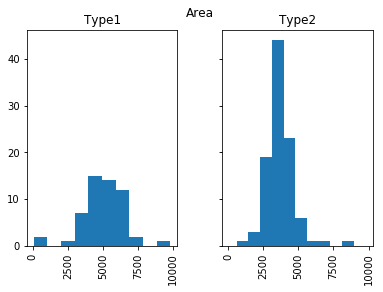

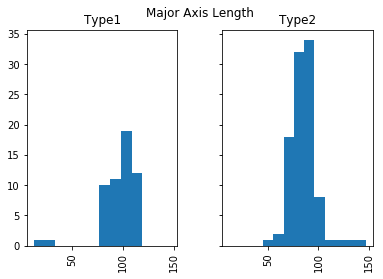

In [20]:
# Import matplotlib's pyplot to be able to add the title to plots
import matplotlib.pyplot as plt

# Plot for area
axes = props_df.hist(column="Area", by="CellType", sharey=True, sharex=True)
plt.suptitle('Area') # Add title

# Plot for Major Axis Length
props_df.hist(column="MajAxisLength", by="CellType", sharey=True, sharex=True)
plt.suptitle('Major Axis Length') # Add title

## Box-Plots

Box plots can be generated in a similar manner to the hist() function. 

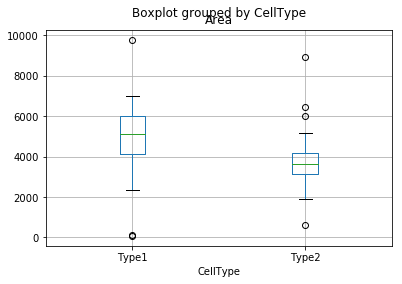

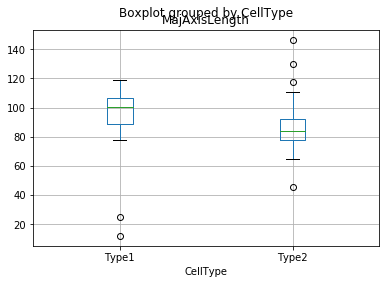

In [21]:
props_df.boxplot(column="Area", by="CellType")
props_df.boxplot(column="MajAxisLength", by="CellType")

# The End

This is the conclusion of the crash course. Hopefully you have gotten enough information from this exercise to go ahead and not only apply the things learnt here to your own problems but to also explore solutions which are specific to you. 

Programming is a very very powerful tool and can reduce a week's worth of manual image measurements to seconds. 

Have fun and don't hesitate to contact me with suggestions and queries.

Thanks!

Aneesh